# Wstęp do Multimediów
### Laboratorium 3
Łukasz Jaremek

310710

---

In [1]:
import os

mono_path = "monochrome"

for _, _, mono_image_names in os.walk(mono_path):
    pass

print(mono_image_names)


['anemone_mono.png', 'baboon_mono.png', 'barbara_mono.png', 'beach_mono.png', 'bikes_mono.png', 'boat2_mono.png', 'boat_mono.png', 'city_mono.png', 'country_mono.png', 'czapki_mono.png', 'flowers_mono.png', 'football_mono.png', 'front_mono.png', 'galera_mono.png', 'girl_mono.png', 'gory_mono.png', 'house1_mono.png', 'houses_mono.png', 'house_mono.png', 'knobbolt_mono.png', 'kwiaty_mono.png', 'latarnia2_mono.png', 'latarnia_mono.png', 'mobile_mono.png', 'monarch_mono.png', 'parrots_mono.png', 'peppers_mono.png', 'rafting_mono.png', 'redhood_mono.png', 'sailboats_mono.png', 'sailboat_mono.png', 'samolot_mono.png', 'soccer_mono.png', 'statue_mono.png', 'susie_mono.png', 'wyspa_mono.png']


Image number: 30


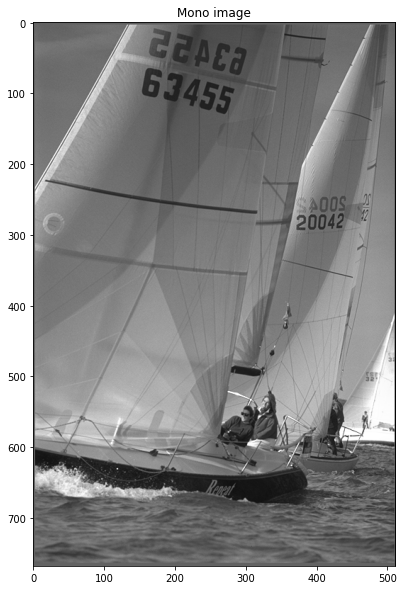

In [2]:
from matplotlib import pyplot as plt
import cv2

STUDENT_NUMBER = 310710
IMAGES = len(mono_image_names)

IMAGE_NUMBER = STUDENT_NUMBER % IMAGES
image_mono_path = mono_path+"/"+mono_image_names[IMAGE_NUMBER]
COLOR_IMAGE = cv2.imread(image_mono_path)
print("Image number:", IMAGE_NUMBER)


figure, axs = plt.subplots(1, 1, figsize=(15, 10))

axs.imshow(COLOR_IMAGE, vmin=0, vmax=255)
axs.title.set_text("Mono image")

plt.show()


---

### 1. Obliczyć przepływność (liczbę bitów przypadającą na jeden piksel) dla obrazu skompresowanego koderem PNG (obraz wejściowy)

In [3]:
bitrate = 8*os.stat(image_mono_path).st_size/(COLOR_IMAGE.shape[0]*COLOR_IMAGE.shape[1])
print(f"Bitrate: {bitrate:.4f}")

Bitrate: 4.6908


---

### 2. Obliczyć entropię obrazu i porównać ją z wyliczoną przepływnością. Czy przepływność mniejsza od entropii oznacza, że zależność: $l_{śr} ≥ H$ jest nieprawdziwa?

In [4]:
import numpy as np


def calc_entropy(hist):
    pdf = hist / hist.sum()
    entropy = -sum([x*np.log2(x) for x in pdf if x != 0])
    return entropy


hist_of_image = cv2.calcHist([COLOR_IMAGE], [0], None, [256], [0, 256]).flatten()
IMAGE_WIDTH = len(COLOR_IMAGE[0])
IMAGE_HEIGHT = len(COLOR_IMAGE)

if hist_of_image.sum() != IMAGE_WIDTH*IMAGE_HEIGHT:
    raise Exception("Sum of histagram is not equal image pixels")

entropy = calc_entropy(hist_of_image)
print(f"Entropy = {entropy:.4f}")


Entropy = 7.1362


Przepływowość jest mniejsza od entropii (4.69 < 7.13) lecz to nie musi oznaczać że $l_{śr} ≥ H$. Problemem może być dekoder, który prawdopodobnie zatraca informacje przy dekodowaniu.

---

### 3. Wyznaczyć obraz różnicowy w taki sposób, że wartość każdego piksela zastępowana jest różnicą pomiędzy wartością tego piksela a wartością jego lewego sąsiada (kodowanie różnicowe /. predykcyjne). Dla pierwszego piksela w linii należy przyjąć wartość sąsiada równą 127 (środkowa wartość przedziału zmienności wartości pikseli).
### Wyświetlić obraz różnicowy.
### Wyznaczyć histogram obrazu różnicowego i porównać go z histogramem obrazu oryginalnego.
### Wyznaczyć entropię obrazu różnicowego i porównać ją z entropią obrazu oryginalnego.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


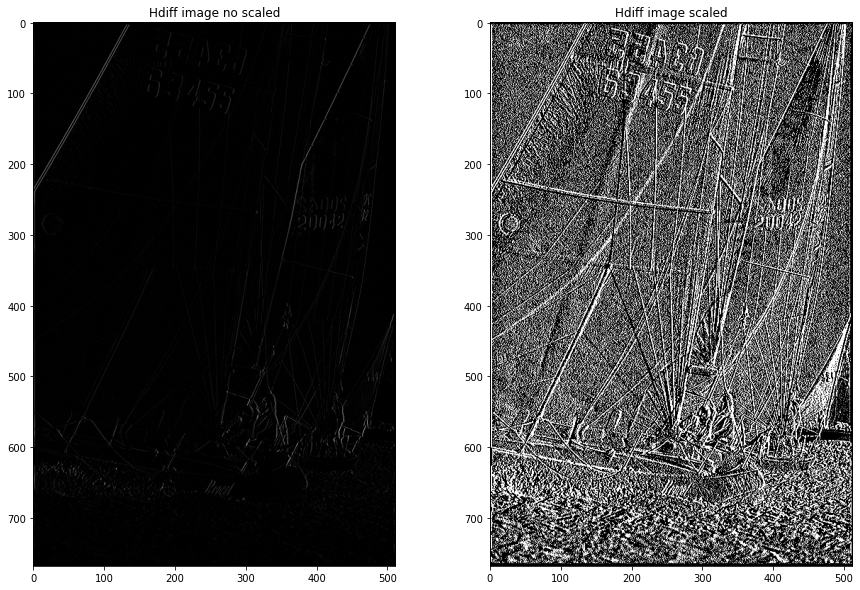

In [5]:
img_tmp1 = COLOR_IMAGE[:, 1: ]  # wszystkie wiersze od kolumny pierwszej
img_tmp2 = COLOR_IMAGE[:, :-1]  # wszystkie wiersze od kolumny zerowej do przedostatniej

image_hdiff = cv2.addWeighted(img_tmp1, 1, img_tmp2, -1, 0, dtype=cv2.CV_16S)
image_hdiff_0 = cv2.addWeighted(COLOR_IMAGE[:, 0], 1, 0, 0, -127, dtype=cv2.CV_16S)  # odejmowanie od zerowej kolumny -127

image_hdiff = image_hdiff.tolist()
[image_hdiff[index].append(image_hdiff_0[index])
 for index in range(len(image_hdiff))]
image_hdiff = np.array(image_hdiff)


figure, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(image_hdiff, vmin=-255, vmax=255)
axs[0].title.set_text("Hdiff image no scaled")

axs[1].imshow(image_hdiff*128, vmin=-255, vmax=255)
axs[1].title.set_text("Hdiff image scaled")

plt.show()


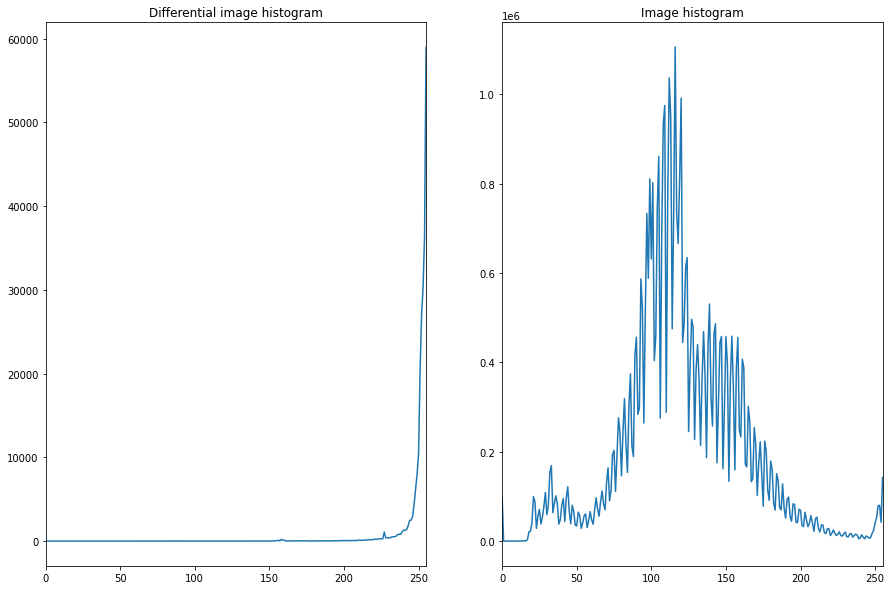

In [6]:
image_tmp = (image_hdiff + 255).astype(np.uint16)

hist_hdiff = cv2.calcHist([image_tmp], [0], None, [511], [0, 511])
hist_normal = cv2.calcHist([COLOR_IMAGE], [0], None, [256], [0, 256])

figure, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].plot(hist_hdiff)
axs[0].set_xlim([0, 255])
axs[0].title.set_text("Differential image histogram")

axs[1].plot(hist_normal*128)
axs[1].set_xlim([0, 255])
axs[1].title.set_text("Image histogram")

plt.show()


In [7]:
hdiff_entropy = calc_entropy(hist_hdiff.flatten())
print(f"Hdiff Entropy = {hdiff_entropy:.4f}")


Hdiff Entropy = 4.6109


Entropia obrazu różnicowego jest mniejsza niż obrazu oryginalnego, jest to efekt oczekiwany.

---

### 4. Wyznaczyć współczynniki DWT korzystając z funkcji zamieszczonej w przykładowym skrypcie.
### Wyświetlić poszczególne pasma.
### Wyznaczyć histogramy i obliczyć entropię dla wszystkich pasm.
### Porównać wyniki (histogram, entropia) uzyskane dla poszczególnych pasm między sobą (czy któreś się wyróżniają i dlaczego?) oraz z wynikami uzyskanymi dla obrazu oryginalnego i obrazu różnicowego.

In [8]:
def calc_dwt(img):
    maskL = np.array([
         0.02674875741080976,
        -0.01686411844287795,
        -0.07822326652898785,
         0.26686411844287230,
         0.60294901823635790,
         0.26686411844287230,
        -0.07822326652898785,
        -0.01686411844287795,
         0.02674875741080976
         ])

    maskH = np.array([
         0.09127176311424948,
        -0.05754352622849957,
        -0.59127176311424700,
         1.11508705245699400,
        -0.59127176311424700,
        -0.05754352622849957,
         0.09127176311424948
         ])

    bandLL = cv2.sepFilter2D(img,         -1, maskL, maskL)[::2, ::2]
    bandLH = cv2.sepFilter2D(img, cv2.CV_16S, maskL, maskH)[::2, ::2]
    bandHL = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskL)[::2, ::2]
    bandHH = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskH)[::2, ::2]

    return bandLL, bandLH, bandHL, bandHH


Pasma

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


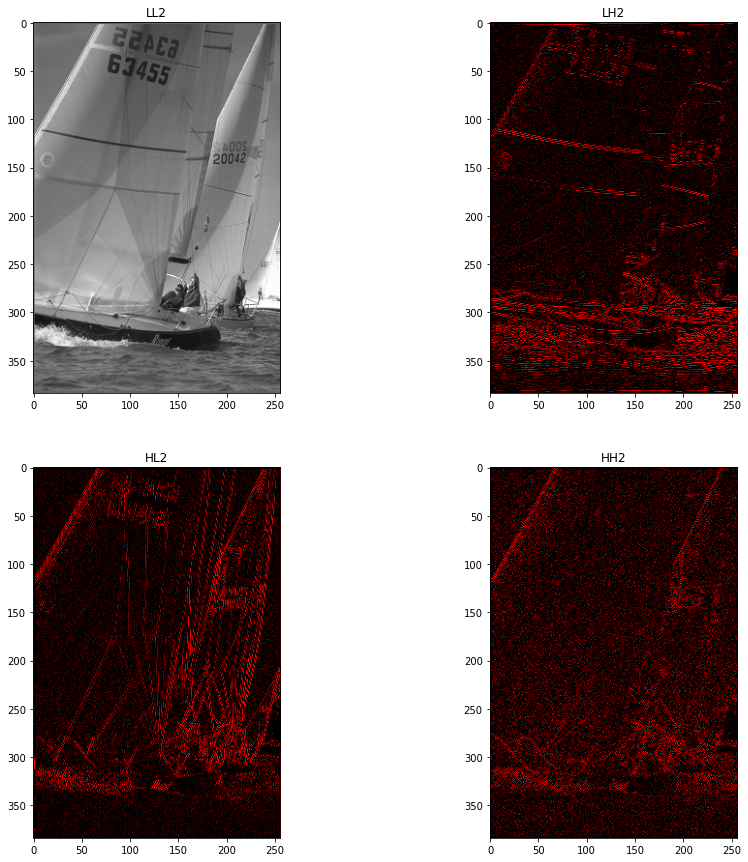

In [9]:
ll, lh, hl, hh = calc_dwt(COLOR_IMAGE)

figure, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].imshow(ll)
axs[0, 0].title.set_text("LL2")

axs[0, 1].imshow(cv2.multiply(lh, 25))
axs[0, 1].title.set_text("LH2")

axs[1, 0].imshow(cv2.multiply(hl, 25))
axs[1, 0].title.set_text("HL2")

axs[1, 1].imshow(cv2.multiply(hh, 25))
axs[1, 1].title.set_text("HH2")

plt.show()


Histogramy

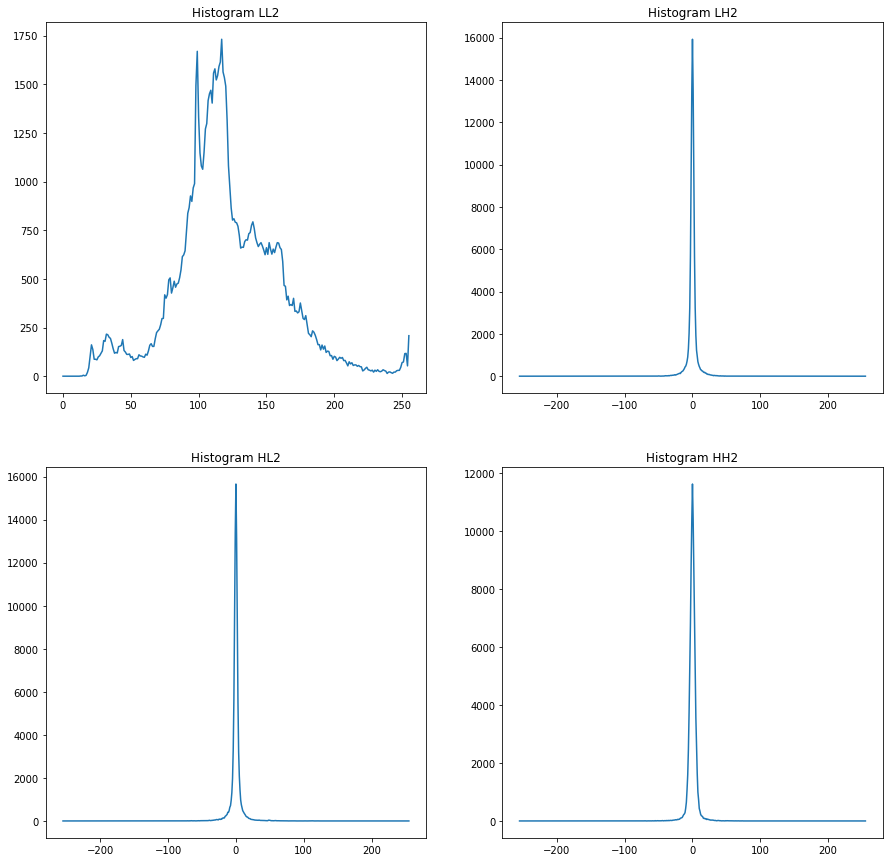

In [10]:
hist_ll = cv2.calcHist([ll],                         [0], None, [256], [0, 256]).flatten()
hist_lh = cv2.calcHist([(lh+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten()
hist_hl = cv2.calcHist([(hl+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten()
hist_hh = cv2.calcHist([(hh+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten()

figure, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].plot(hist_ll)
axs[0, 0].title.set_text("Histogram LL2")

axs[0, 1].plot(range(-255, 256), hist_lh)
axs[0, 1].title.set_text("Histogram LH2")

axs[1, 0].plot(range(-255, 256), hist_hl)
axs[1, 0].title.set_text("Histogram HL2")

axs[1, 1].plot(range(-255, 256), hist_hh)
axs[1, 1].title.set_text("Histogram HH2")

plt.show()


Entropie pasm

In [11]:
H_ll = calc_entropy(hist_ll)
H_lh = calc_entropy(hist_lh)
H_hl = calc_entropy(hist_hl)
H_hh = calc_entropy(hist_hh)

print(f"H(LL) = {H_ll:.4f}")
print(f"H(LH) = {H_lh:.4f}")
print(f"H(HL) = {H_hl:.4f}")
print(f"H(HH) = {H_hh:.4f}")
print(f"H_śr = {(H_ll+H_lh+H_hl+H_hh)/4:.4f}")


H(LL) = 7.1867
H(LH) = 4.0957
H(HL) = 4.1940
H(HH) = 4.2259
H_śr = 4.9256


### 5. Obliczyć entropię dla składowych RGB barwnego obrazu testowego.


['anemone_col.png', 'baboon_col.png', 'barbara_col.png', 'beach_col.png', 'bikes_col.png', 'boat2_col.png', 'boat_col.png', 'city_col.png', 'country_col.png', 'czapki_col.png', 'flowers_col.png', 'football_col.png', 'front_col.png', 'galera_col.png', 'girl_col.png', 'gory_col.png', 'house1_col.png', 'houses_col.png', 'house_col.png', 'knobbolt_col.png', 'kwiaty_col.png', 'latarnia2_col.png', 'latarnia_col.png', 'mobile_col.png', 'monarch_col.png', 'parrots_col.png', 'peppers_col.png', 'rafting_col.png', 'redhood_col.png', 'sailboats_col.png', 'sailboat_col.png', 'samolot_col.png', 'soccer_col.png', 'statue_col.png', 'susie_col.png', 'wyspa_col.png']


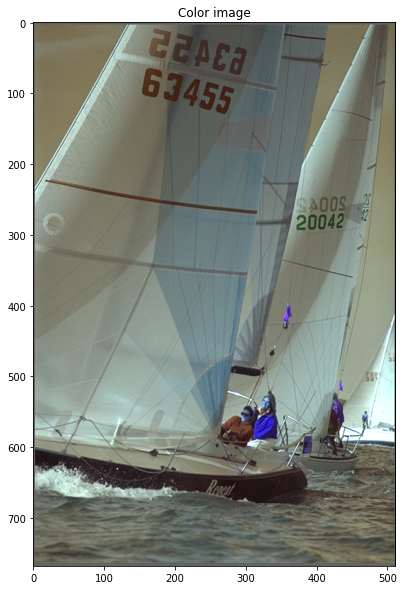

In [12]:
color_path = "color"

for _, _, color_image_names in os.walk(color_path):
    pass

print(color_image_names)
image_color_path = color_path+"/"+color_image_names[IMAGE_NUMBER]
COLOR_IMAGE = cv2.imread(image_color_path)

figure, axs = plt.subplots(1, 1, figsize=(15, 10))

axs.imshow(COLOR_IMAGE, cmap="gray", vmin=0, vmax=255)
axs.title.set_text("Color image")

plt.show()



In [13]:
image_R = COLOR_IMAGE[:, :, 2]
image_G = COLOR_IMAGE[:, :, 1]
image_B = COLOR_IMAGE[:, :, 0]

hist_R = cv2.calcHist([image_R], [0], None, [256], [0, 256]).flatten()
hist_G = cv2.calcHist([image_G], [0], None, [256], [0, 256]).flatten()
hist_B = cv2.calcHist([image_B], [0], None, [256], [0, 256]).flatten()

H_R = calc_entropy(hist_R)
H_G = calc_entropy(hist_G)
H_B = calc_entropy(hist_B)

print(f"H(R) = {H_R:.4f}")
print(f"H(G) = {H_G:.4f}")
print(f"H(B) = {H_B:.4f}")
print(f"H_śr = {(H_R+H_G+H_B)/3:.4f}")


H(R) = 7.1815
H(G) = 7.2301
H(B) = 7.0313
H_śr = 7.1476


---

### 6. Dokonać konwersji z RGB do YUV i obliczyć entropię dla składowych YUV. 
### Wyznaczyć histogramy dla wszystkich składowych.
### Porównać wyniki uzyskane dla poszczególnych składowych. Czy dla składowych UV entropia jest mniejsza? Z czego ta mniejsza wartość może wynikać?


In [14]:
image_YUV = cv2.cvtColor(COLOR_IMAGE, cv2.COLOR_BGR2YUV)

hist_Y = cv2.calcHist([image_YUV[:, :, 0]], [0], None, [256], [0, 256]).flatten()
hist_U = cv2.calcHist([image_YUV[:, :, 1]], [0], None, [256], [0, 256]).flatten()
hist_V = cv2.calcHist([image_YUV[:, :, 2]], [0], None, [256], [0, 256]).flatten()

H_Y = calc_entropy(hist_Y)
H_U = calc_entropy(hist_U)
H_V = calc_entropy(hist_V)

print(f"H(Y) = {H_Y:.4f}")
print(f"H(U) = {H_U:.4f}")
print(f"H(V) = {H_V:.4f}")
print(f"H_śr = {(H_Y+H_U+H_V)/3:.4f}")


H(Y) = 7.1264
H(U) = 4.4768
H(V) = 4.4486
H_śr = 5.3506


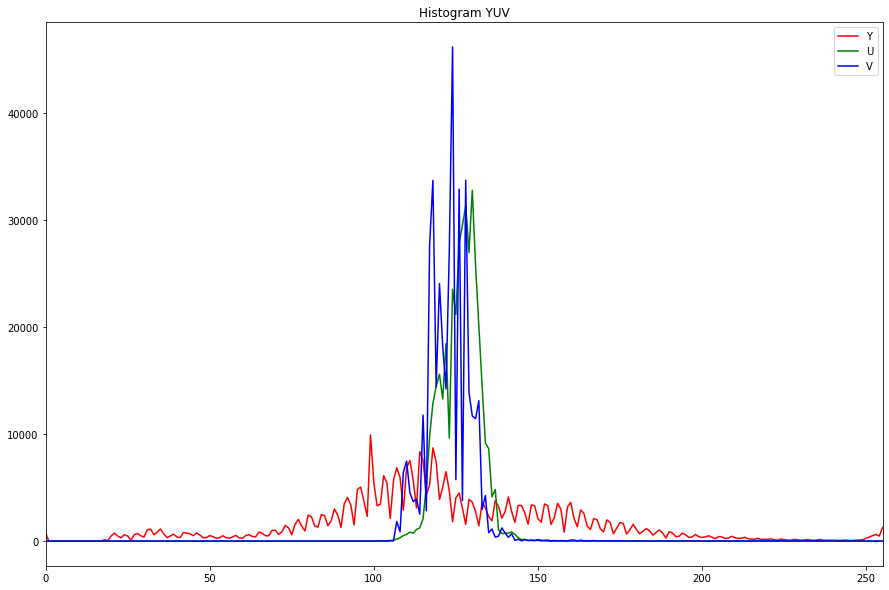

In [15]:
figure, axs = plt.subplots(1, 1, figsize=(15, 10))

axs.plot(hist_Y, label="Y", color="red")
axs.plot(hist_U, label="U", color="green")
axs.plot(hist_V, label="V", color="blue")
axs.title.set_text("Color image")

plt.title("Histogram YUV")
plt.xlim([0, 255])
plt.legend()
plt.show()


Entropia dla $U$ i $V$ jest wyraźnie niższa (~4) względem entropii $Y$ (~7). Równolegle, histogramy $U$ i $V$ mają wyższe wartości względem $Y$ => posiadają mniej informacji, co tłumaczy różnicę w entropii.

---

### 7. Wyznaczyć zależność zniekształcenia D od przepływności R (liczba bitów przypadającą na jeden piksel obrazu): $D = f(R)$ – tzw. krzywa R-D – dla kodera JPEG. Regulacji stopnia kompresji (przepływności R) należy dokonywać ustawiając wartości parametru ‘quality’ przy zapisie obrazu do pliku. Wartości parametru ‘quality’ należy dobrać tak, aby uzyskać ‘gładkie’ wykresy. Jako miarę zniekształceń należy użyć szczytowy stosunek sygnału do szumu PSNR i błąd średniokwadratowy MSE. Zobrazować zależności na wykresach (oddzielny wykres dla każdej miary). Dokonać subiektywnej oceny obrazów zrekonstruowanych (według własnej skali ocen, np.: jakość doskonała, bardzo dobra, dobra, średnia, kiepska, zła, bardzo zła, itp., lub: zniekształcenia niewidoczne, lekko widoczne, widoczne, bardzo widoczne, nie do przyjęcia, itp.) i zamieścić te oceny w sprawozdaniu (niekoniecznie dla każdego obrazu wynikowego osobno, raczej ‘zgrupować’ oceny dla pewnych zakresów przepływności). Porównać stopnie kompresji uzyskiwane dla kodera JPEG ze stopniem kompresji uzyskanym dla kodera PNG (pamiętając, że w pierwszej części laboratorium wykorzystywany był monochromatyczny obraz PNG, a kompresja JPEG była wykonywana dla obrazu barwnego; ewentualnie wyliczyć przepływność bitową dla obrazu barwnego skompresowanego koderem PNG.

In [16]:
IMAX = 255. ** 2


def calc_mse_psnr(img1, img2):
    """
    Funkcja obliczająca MSE i PSNR dla różnicy podanych obrazów,
    zakładana wartość pikseli z przedziału [0, 255].
    """
    mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size
    psnr = 10.0*np.log10(IMAX/mse)
    return mse, psnr


In [17]:
x_range = list(range(0, 141, 10))[::-1]

bitrate = []
mse = []
psnr = []

for quality in x_range:
    out_file_name = f"out/out_image_q{quality:03d}.jpg"
    cv2.imwrite(out_file_name, COLOR_IMAGE, (cv2.IMWRITE_JPEG_QUALITY, quality))

    image_compressed = cv2.imread(out_file_name, cv2.IMREAD_UNCHANGED)
    temp_bitrate = 8*os.stat(out_file_name).st_size/(COLOR_IMAGE.shape[0]*COLOR_IMAGE.shape[1])
    temp_mse, temp_psnr = calc_mse_psnr(COLOR_IMAGE, image_compressed)

    bitrate.append(temp_bitrate)
    mse.append(temp_mse)
    psnr.append(temp_psnr)


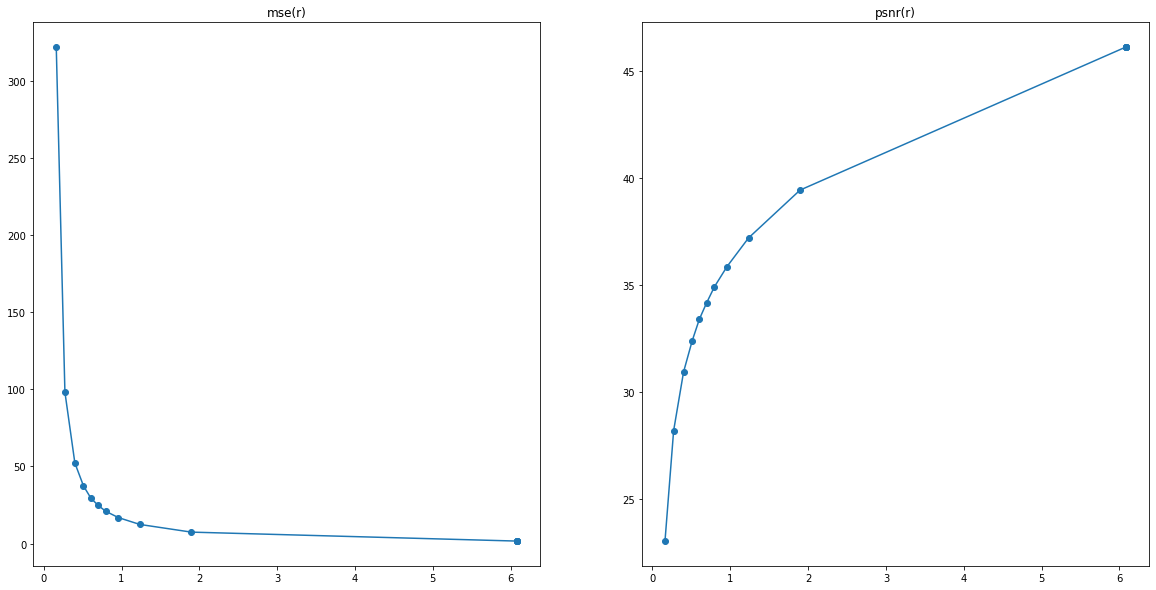

In [18]:
figure, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(bitrate, mse,  "-o")
axs[0].title.set_text("mse(r)")

axs[1].plot(bitrate, psnr, "-o")
axs[1].title.set_text("psnr(r)")

plt.show()


Q w przedziale {0}:
- Obraz całkowicie niewyraźny

Q w przedziale (0, 70>:
- Obraz lekko niewyraźny

Q w przedziale (70, 100>:
- Obraz w stanie przyzwoitym, brak większych różnic

Q w przedziale 100+:
- Brak różnicy

Porównanie PNG z JPG

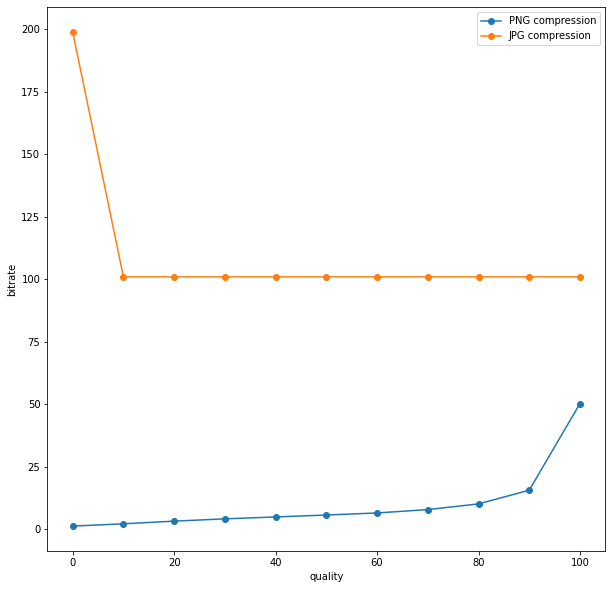

In [19]:
jpg = []
png = []

color_image_size = os.stat(image_color_path).st_size

for quality in x_range[x_range.index(100):]:
    cv2.imwrite(f"png_vs_jpg/out_image_q{quality:03d}.jpg", COLOR_IMAGE, (cv2.IMWRITE_JPEG_QUALITY, quality))
    cv2.imwrite(f"png_vs_jpg/out_image_q{quality:03d}.png", COLOR_IMAGE, (cv2.IMWRITE_PNG_COMPRESSION, quality))
    jpg.append((os.stat(f"png_vs_jpg/out_image_q{quality:03d}.jpg").st_size/color_image_size)*100)
    png.append((os.stat(f"png_vs_jpg/out_image_q{quality:03d}.png").st_size/color_image_size)*100)

figure, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.plot(x_range[x_range.index(100):], jpg, "-o", label="PNG compression")
axs.plot(x_range[x_range.index(100):], png, "-o", label="JPG compression")
axs.set_xlabel("quality")
axs.set_ylabel("bitrate")

plt.legend()
plt.show()


Kompresja PNG wyraźnie się zwiększa, razem ze wzrostem $quality$, w porównaniu do $bitrate$ dla JPG, który jest stały. Różnica jednak jest taka, że PNG pomimo wysokiej jak dla niego kompresji i tak nie może się równać kompresji formatu JPG, który co jeszcze ciekawe przy $quality = 0$ jest najwyższy.